# Eye Surgery Data Analysis
by Parham Shahidi

### Key findings
- Information includes DOB, Insurance, Sex, Success, Surgeon, Correction type, Treatment, Initial Severity
- Surgeon ID 6 was most prolific surgeon
- Severe initial conditions tend to have more unsuccessful outcomes
- Of the unsuccessful operations most were undercorrections
- Number of surgeries sharply drop off after age 47

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from IPython.display import display
import matplotlib.pyplot as plt

### Read in data and get overview

In [2]:
file='/Users/parham/Documents/Job Search/Apple/11-2-16_data_analyst_case_study.csv'

In [3]:
data=pd.read_csv(file)
data.dropna();

In [4]:
display(data.head(5))

,date_of_birth,patient_insurance,patient_sex,success,surgeon_id,over_under_correction,treatment,initial_severity
0,3/14/70,D,Male,True,18,NaN,X,MINOR
1,10/23/98,I,Male,True,17,NaN,Y,MINOR
2,7/25/74,A,Male,True,8,NaN,Y,MINOR
3,11/6/82,D,Male,True,8,NaN,X,MINOR
4,7/24/70,B,Male,True,9,NaN,Y,SEVERE


In [5]:
print("Length of data set: {}".format(len(data)))

Length of data set: 3500


### Print some frequencies

In [6]:
for i in data.columns[1:]:
    print("\n{}: {}".format(i,format(Counter(data[i]))))


patient_insurance: Counter({'I': 388, 'C': 372, 'B': 358, 'A': 350, 'E': 350, 'G': 348, 'J': 336, 'F': 334, 'H': 331, 'D': 330, nan: 3})

patient_sex: Counter({'Male': 2094, 'Female': 1405, 'Malle': 1})

success: Counter({True: 2810, False: 690})

surgeon_id: Counter({6: 593, 10: 246, 5: 215, 13: 209, 17: 202, 20: 199, 30: 194, 32: 192, 8: 190, 18: 186, 25: 161, 19: 145, 4: 130, 16: 92, 9: 91, 3: 86, 11: 85, 12: 74, 21: 45, 7: 44, 31: 42, 43: 26, 2: 23, 28: 14, 22: 11, 41: 3, 0: 1, 24: 1})

over_under_correction: Counter({nan: 2810, 'UNDER': 599, 'OVER': 91})

treatment: Counter({'Y': 1750, 'X': 1750})

initial_severity: Counter({'MINOR': 1785, 'SEVERE': 1715})


### Two way tables to see relationship to successful surgeries

In [7]:
pd.options.display.max_columns=150

In [8]:
for i in data.columns:
    if i!='success' and i!='date_of_birth':
        surgeries = pd.crosstab(index=data["success"], columns=data[i])
        print('\n')
        display(surgeries)

patient_insurance,A,B,C,D,E,F,G,H,I,J
success,,,,,,,,,,
False,76,77,72,66,74,63,71,56,77,58
True,274,281,300,264,276,271,277,275,311,278


patient_sex,Female,Male,Malle
success,,,
False,290,399,1
True,1115,1695,0


surgeon_id,0,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,21,22,24,25,28,30,31,32,41,43
success,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,4,11,18,36,182,6,38,15,24,15,13,40,14,30,24,27,36,9,0,0,34,1,66,7,35,1,3
True,0,19,75,112,179,411,38,152,76,222,70,61,169,78,172,162,118,163,36,11,1,127,13,128,35,157,2,23


over_under_correction,OVER,UNDER
success,,
False,91,599


treatment,X,Y
success,,
False,385,305
True,1365,1445


initial_severity,MINOR,SEVERE
success,,
False,210,480
True,1575,1235


### Graphical visualizations

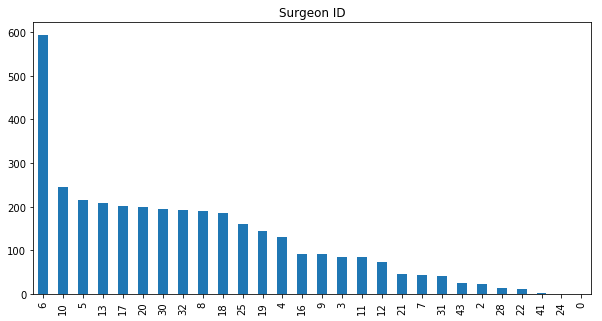

In [9]:
plt.figure(figsize=(10,5))
plt.title('Surgeon ID')
data['surgeon_id'].value_counts().plot(kind='bar')
plt.show()

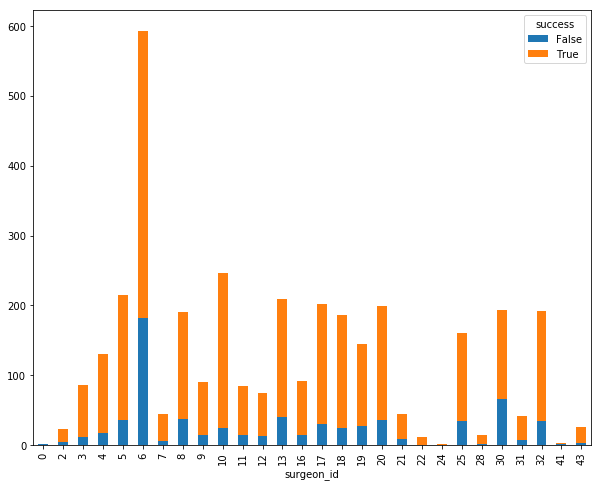

In [10]:
surgeries = pd.crosstab(index=data["surgeon_id"], columns=data['success'])
surgeries.plot(kind="bar", figsize=(10,8), stacked=True)
plt.show()

### Graphical visualization of success vs no success in each feature

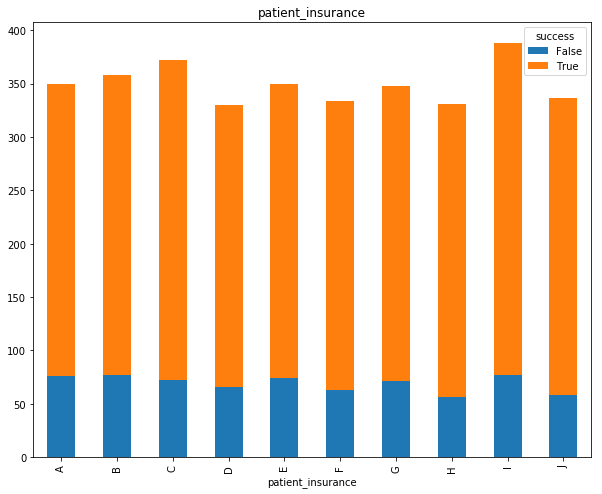

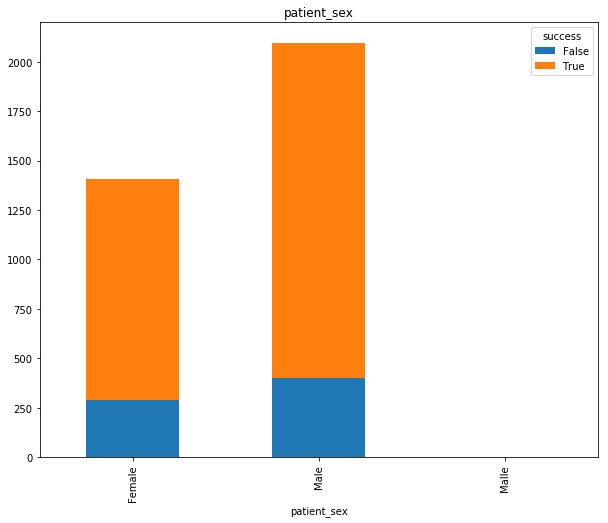

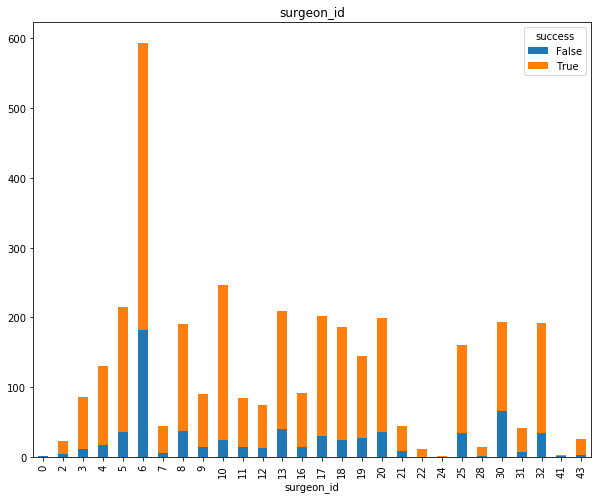

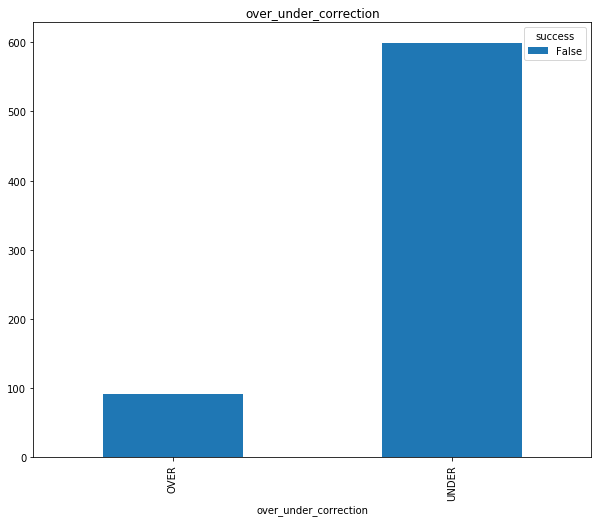

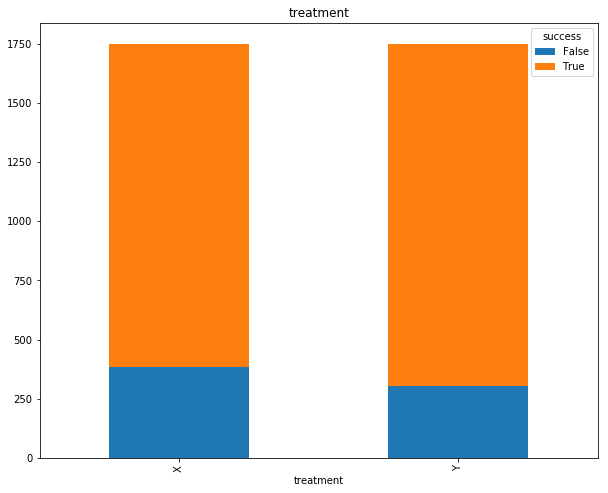

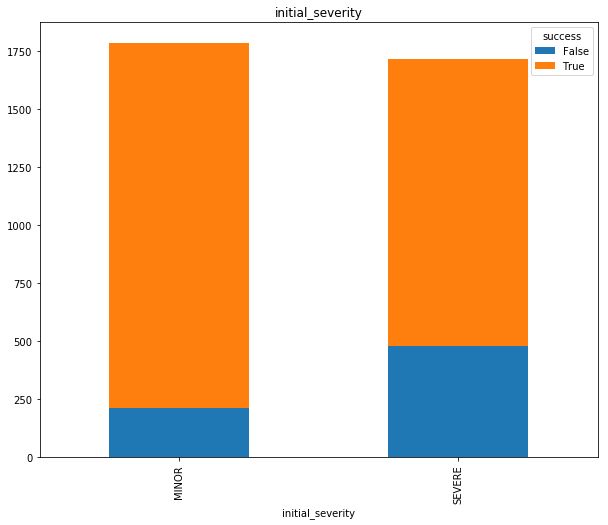

In [11]:
for i in data.columns:
    if i!='success' and i!='date_of_birth':
        surgeries = pd.crosstab(index=data[i], columns=data['success'])
        surgeries.plot(kind="bar", figsize=(10,8), stacked=True)
        plt.title(i)
        plt.show()

### Correlation of Surgeon to over under correction

In [12]:
surgeon_over_under = pd.crosstab(index=data["over_under_correction"], columns=data["surgeon_id"])
surgeon_over_under

surgeon_id,0,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,21,25,28,30,31,32,41,43
over_under_correction,,,,,,,,,,,,,,,,,,,,,,,,,,
OVER,0,0,1,4,6,24,1,6,3,6,3,1,5,2,1,1,3,6,0,2,0,9,2,4,1,0
UNDER,1,4,10,14,30,158,5,32,12,18,12,12,35,12,29,23,24,30,9,32,1,57,5,31,0,3


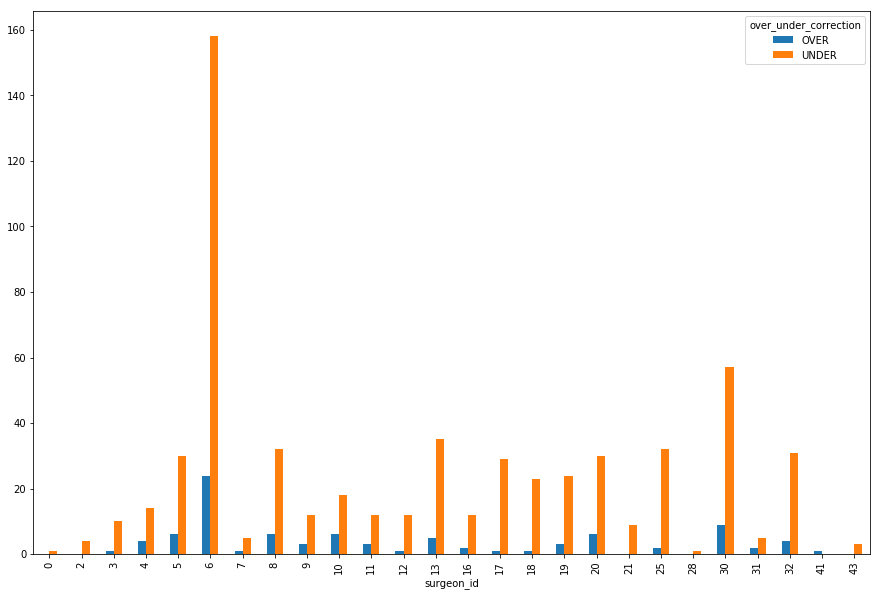

In [13]:
surgeon_over_under = pd.crosstab(index=data["surgeon_id"], columns=data["over_under_correction"])
surgeon_over_under.plot(kind="bar", figsize=(15,10), stacked=False)
plt.show()

### Correlation of age to success

In [14]:
dob=data["date_of_birth"]
dob_year=[]
age=[]

In [15]:
for i in range(len(dob)):
    year='19'+dob[i].split("/")[2]
    dob_year.append(year)
    age.append(2017-int(dob_year[i]))

In [16]:
df_age=data.copy()
df_age['age']=age
df_age=df_age[['success','age']]

In [17]:
age_success = pd.crosstab(index=df_age["success"], columns=df_age["age"])
age_success

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,114,115,116,117
success,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,14,24,22,21,17,21,15,28,18,32,26,28,27,22,23,17,17,30,21,28,17,24,30,22,22,20,23,38,23,0,2,0,0,0,1,0,1,1,0,0,0,0,0,2,0,2,2,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1,1
True,2,84,99,77,89,74,90,81,87,78,82,89,86,80,92,78,83,91,100,107,112,104,110,102,107,104,96,99,107,100,3,4,4,4,3,4,7,3,7,1,4,4,3,5,1,1,4,2,4,2,6,1,2,4,1,5,4,4,4,5,6,4,3,1


In [18]:
df_age.loc[df_age['age']==48]

,success,age
403,True,48
1690,True,48
2237,True,48
